# **Breast Cancer Status Classification** – *Tiesya Andriani Ramadhanti MC189D5X0428*

Proyek ini bertujuan untuk mengklasifikasikan **status pasien kanker payudara** (Hidup atau Meninggal) berdasarkan berbagai variabel medis dan demografis seperti stadium kanker (T Stage, N Stage, A Stage), status hormon (Estrogen & Progesterone), ras, status pernikahan, hingga tingkat diferensiasi sel kanker. Dengan pendekatan **machine learning untuk klasifikasi biner**, model ini diharapkan mampu membantu dalam mengidentifikasi pasien dengan risiko lebih tinggi berdasarkan pola data historis.

📊 **Sumber Dataset**  
Dataset yang digunakan berasal dari Kaggle:  
🔗 [Breast Cancer Dataset – Kaggle](https://www.kaggle.com/datasets/reihanenamdari/breast-cancer)

Dataset ini mencakup informasi lengkap mengenai karakteristik medis pasien dan status kelangsungan hidup mereka setelah diagnosis kanker payudara.


# **Import Libraries**


In [1]:
# Pengolahan Data
import pandas as pd
import numpy as np
import math

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Pra-pemrosesan
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Model Klasifikasi

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluasi Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score




# **Data Loading**

In [2]:
# Upload file CSV
from google.colab import files
uploaded = files.upload()

Saving Breast_Cancer.csv to Breast_Cancer (4).csv


In [3]:
# Membaca file dataset
df_cancer = pd.read_csv('Breast_Cancer.csv')
df_cancer.head()


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


🔍 **Insight Awal dari Dataset Kanker Payudara**

Berdasarkan 5 baris pertama dari dataset (`df_cancer.head()`), berikut beberapa hal yang dapat disimpulkan:

- Dataset ini mencatat **karakteristik demografis dan klinis** pasien kanker payudara.
- Beberapa kolom penting antara lain:
  - **Age**: Usia pasien berkisar antara 47 hingga 68 tahun.
  - **Race**: Semua pasien dalam contoh awal beretnis *White*.
  - **Marital Status**: Mayoritas pasien berstatus *Married*, kecuali satu yang *Divorced*.
  - **T Stage & N Stage**: Menunjukkan tingkat penyebaran tumor dan nodus limfa, bervariasi dari T1 hingga T3 dan N1 hingga N3.
  - **6th Stage & A Stage**: Mengindikasikan stadium kanker, seperti IIA, IIB, IIIA, dan IIIC.
  - **Differentiate & Grade**: Menunjukkan tingkat diferensiasi sel kanker, sebagian besar *Poorly* atau *Moderately differentiated* dengan Grade 2–3.
  - **Tumor Size**: Ukuran tumor sangat bervariasi, dari 4 hingga 63 mm.
  - **Estrogen & Progesterone Status**: Semua pasien memiliki status hormon *Positive* pada contoh awal.
  - **Regional Node Examined & Positive**: Menunjukkan jumlah nodus limfa yang diperiksa dan yang ditemukan positif kanker.
  - **Survival Months**: Rentang waktu kelangsungan hidup pasien sejak diagnosis, berkisar antara 50 hingga 84 bulan.
  - **Status**: Semua pasien dalam contoh ini memiliki status *Alive* (hidup).

📌 **Kesimpulan Awal**
Contoh data menunjukkan bahwa meskipun ada variasi dalam stadium kanker, ukuran tumor, dan kondisi nodus limfa, semua pasien pada lima baris pertama masih dalam kondisi hidup (*Alive*).

## Menampilkan informasi dataset

In [4]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

Output kode di atas memberikan informasi:

Dataset memiliki **16 kolom** dan **4024 baris data**.

Terdapat:

- **5 kolom bertipe data `int64`** yaitu:
  - `Age`, `Tumor Size`, `Regional Node Examined`, `Reginol Node Positive`, dan `Survival Months`
- **11 kolom bertipe data `object`** seperti:
  - `Race`, `Marital Status`, `T Stage`, `Estrogen Status`, `Status`, dan lainnya

Semua kolom memiliki **4024 nilai non-null**, artinya **tidak terdapat nilai Null** pada dataset ini.

Kolom bertipe `int64` berisi data numerik diskrit, mencakup informasi usia pasien, ukuran tumor, jumlah kelenjar getah bening yang diperiksa dan positif, serta lama bertahan hidup (dalam bulan). Sedangkan kolom `object` mencakup informasi kategorikal seperti ras, status pernikahan, stadium kanker, dan status hormon.

Kolom **`Status`** berfungsi sebagai **variabel target klasifikasi**, menunjukkan apakah pasien **masih hidup (Alive)** atau **meninggal (Dead)**. Kolom ini akan digunakan untuk membangun model klasifikasi biner terkait prediksi status pasien kanker payudara.


## Menampilkan statistik dataset:

In [5]:
df_cancer.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


🔍 **Statistik Deskriptif Dataset Breast Cancer**

Berdasarkan statistik deskriptif pada beberapa kolom numerik dalam dataset, diperoleh insight sebagai berikut:

- **Age (Usia Pasien)**
  - Rata-rata usia pasien adalah **~54 tahun**, dengan usia termuda **30 tahun** dan tertua **69 tahun**.
  - Sebagian besar pasien berada dalam rentang usia **47–61 tahun** (kuartil 1 hingga kuartil 3).

- **Tumor Size (Ukuran Tumor)**
  - Rata-rata ukuran tumor adalah **~30 mm**, dengan ukuran terkecil **1 mm** dan terbesar **140 mm**.
  - Setengah dari pasien memiliki ukuran tumor di bawah **25 mm**, dan 75% pasien memiliki ukuran tumor di bawah **38 mm**.
  - Ukuran tumor sangat bervariasi, ditunjukkan dengan standar deviasi yang cukup tinggi (**~21 mm**).

- **Regional Node Examined (Jumlah Kelenjar Getah Bening yang Diperiksa)**
  - Rata-rata jumlah kelenjar yang diperiksa adalah **~14**, dengan rentang dari **1 hingga 61**.
  - Mayoritas pasien memiliki jumlah kelenjar yang diperiksa antara **9 hingga 19**.

- **Reginol Node Positive (Jumlah Kelenjar Getah Bening Positif)**
  - Rata-rata kelenjar positif adalah **~4**, dengan nilai maksimum mencapai **46**, menunjukkan adanya kasus kanker yang telah menyebar secara signifikan.
  - Sebanyak **50% pasien memiliki ≤ 2 kelenjar positif**, menandakan banyak kasus masih dalam tahap penyebaran terbatas.

- **Survival Months (Lama Bertahan Hidup Pasien)**
  - Rata-rata pasien bertahan hidup selama **71 bulan (~6 tahun)**.
  - Median survival adalah **73 bulan**, dengan sebagian besar pasien (75%) bertahan hidup **hingga 90 bulan (~7.5 tahun)**.
  - Terdapat pasien yang hanya bertahan hidup **1 bulan**, namun juga ada yang bertahan hingga **107 bulan (~9 tahun)**.

🧠 **Kesimpulan Awal**:
Sebagian besar pasien adalah wanita usia paruh baya hingga lanjut usia, dengan ukuran tumor sedang dan penyebaran kelenjar getah bening yang bervariasi. Waktu bertahan hidup menunjukkan bahwa banyak pasien memiliki prognosis yang cukup baik, tetapi ada juga yang memiliki kondisi kanker yang agresif.


In [6]:
# Menampilkan jumlah missing value di setiap kolom
print(df_cancer.isnull().sum())

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


Age: 0 outliers
Tumor Size: 222 outliers
Regional Node Examined: 72 outliers
Reginol Node Positive: 344 outliers
Survival Months: 18 outliers


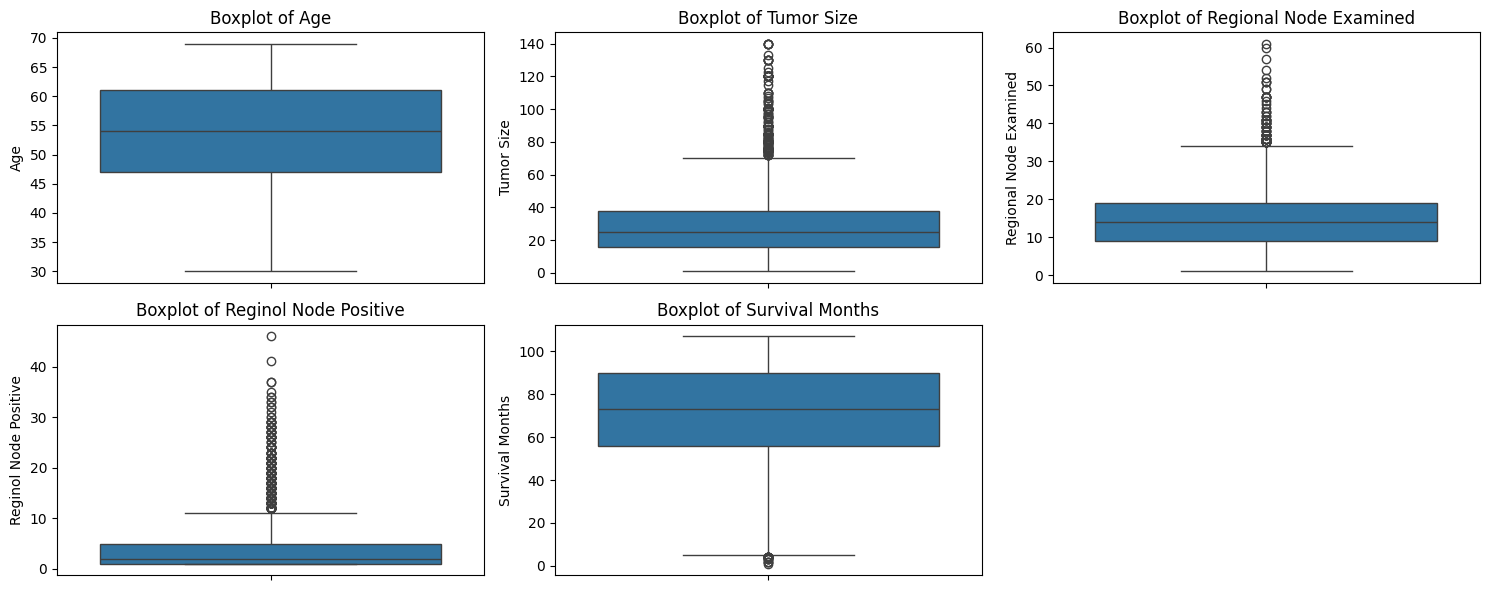

In [7]:
# Kolom numerik yang akan diperiksa outliers nya
numeric_columns = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

# Periksa jumlah outliers untuk setiap kolom numerik
for col in numeric_columns:
    Q1 = df_cancer[col].quantile(0.25)
    Q3 = df_cancer[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_cancer[(df_cancer[col] < Q1 - 1.5 * IQR) | (df_cancer[col] > Q3 + 1.5 * IQR)]
    print(f'{col}: {len(outliers)} outliers')

# Visualisasi boxplot dari kolom numerik untuk mendeteksi outlier
plt.figure(figsize=(15, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Menggunakan 2 baris dan 3 kolom, cukup untuk 5 boxplot
    sns.boxplot(y=df_cancer[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

## Insight dari Boxplot kolom numerik

### 1. Boxplot of Age
- Mayoritas pasien berusia antara sekitar 47 hingga 65 tahun.
- Usia minimum berada di sekitar 30 tahun.
- Tidak terdapat outlier yang signifikan pada distribusi usia.

### 2. Boxplot of Tumor Size
- Ukuran tumor sebagian besar berada pada rentang 15 hingga 40 mm.
- Terdapat banyak outlier di atas 70 mm, menunjukkan bahwa beberapa pasien memiliki ukuran tumor yang jauh lebih besar dari mayoritas pasien lainnya.

### 3. Boxplot of Regional Node Examined
- Sebagian besar pasien memiliki antara 5 hingga 25 kelenjar getah bening regional yang diperiksa.
- Terdapat sejumlah outlier yang menunjukkan bahwa beberapa pasien diperiksa lebih dari 50 kelenjar.

### 4. Boxplot of Regional Node Positive
- Mayoritas pasien memiliki hasil positif pada 0 hingga 5 kelenjar getah bening.
- Terdapat banyak outlier dengan jumlah kelenjar positif lebih dari 10, bahkan mencapai lebih dari 40.

### 5. Boxplot of Survival Months
- Masa bertahan hidup sebagian besar pasien berkisar antara 50 hingga 100 bulan.
- Ada beberapa outlier di bawah 10 bulan, menunjukkan adanya pasien dengan masa hidup yang sangat singkat setelah diagnosis.

## Kesimpulan Umum
- Beberapa fitur seperti Tumor Size, Regional Node Examined, dan Regional Node Positive menunjukkan adanya distribusi miring (skewed) dan memiliki outlier.
- Sebaliknya, Age dan Survival Months memiliki distribusi yang lebih seimbang meskipun masih menunjukkan beberapa nilai ekstrem.
- Insight ini dapat digunakan untuk melakukan transformasi data (misal: log transformation) atau menangani outlier pada tahap preprocessing model machine learning.

## Univariate Analysis
Membagi dataset berdasarkan tipe data yaitu categorical dan numerical.

In [8]:
# Memisahkan kolom berdasarkan tipe datanya
categorical_columns = df_cancer.select_dtypes(include=['object']).columns
numerical_columns = df_cancer.select_dtypes(include=['int64', 'float64']).columns

# Menampilkan nama-nama kolom berdasarkan tipe data
print("Kolom kategorikal:", list(categorical_columns))
print("Kolom numerikal:", list(numerical_columns))

Kolom kategorikal: ['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']
Kolom numerikal: ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']


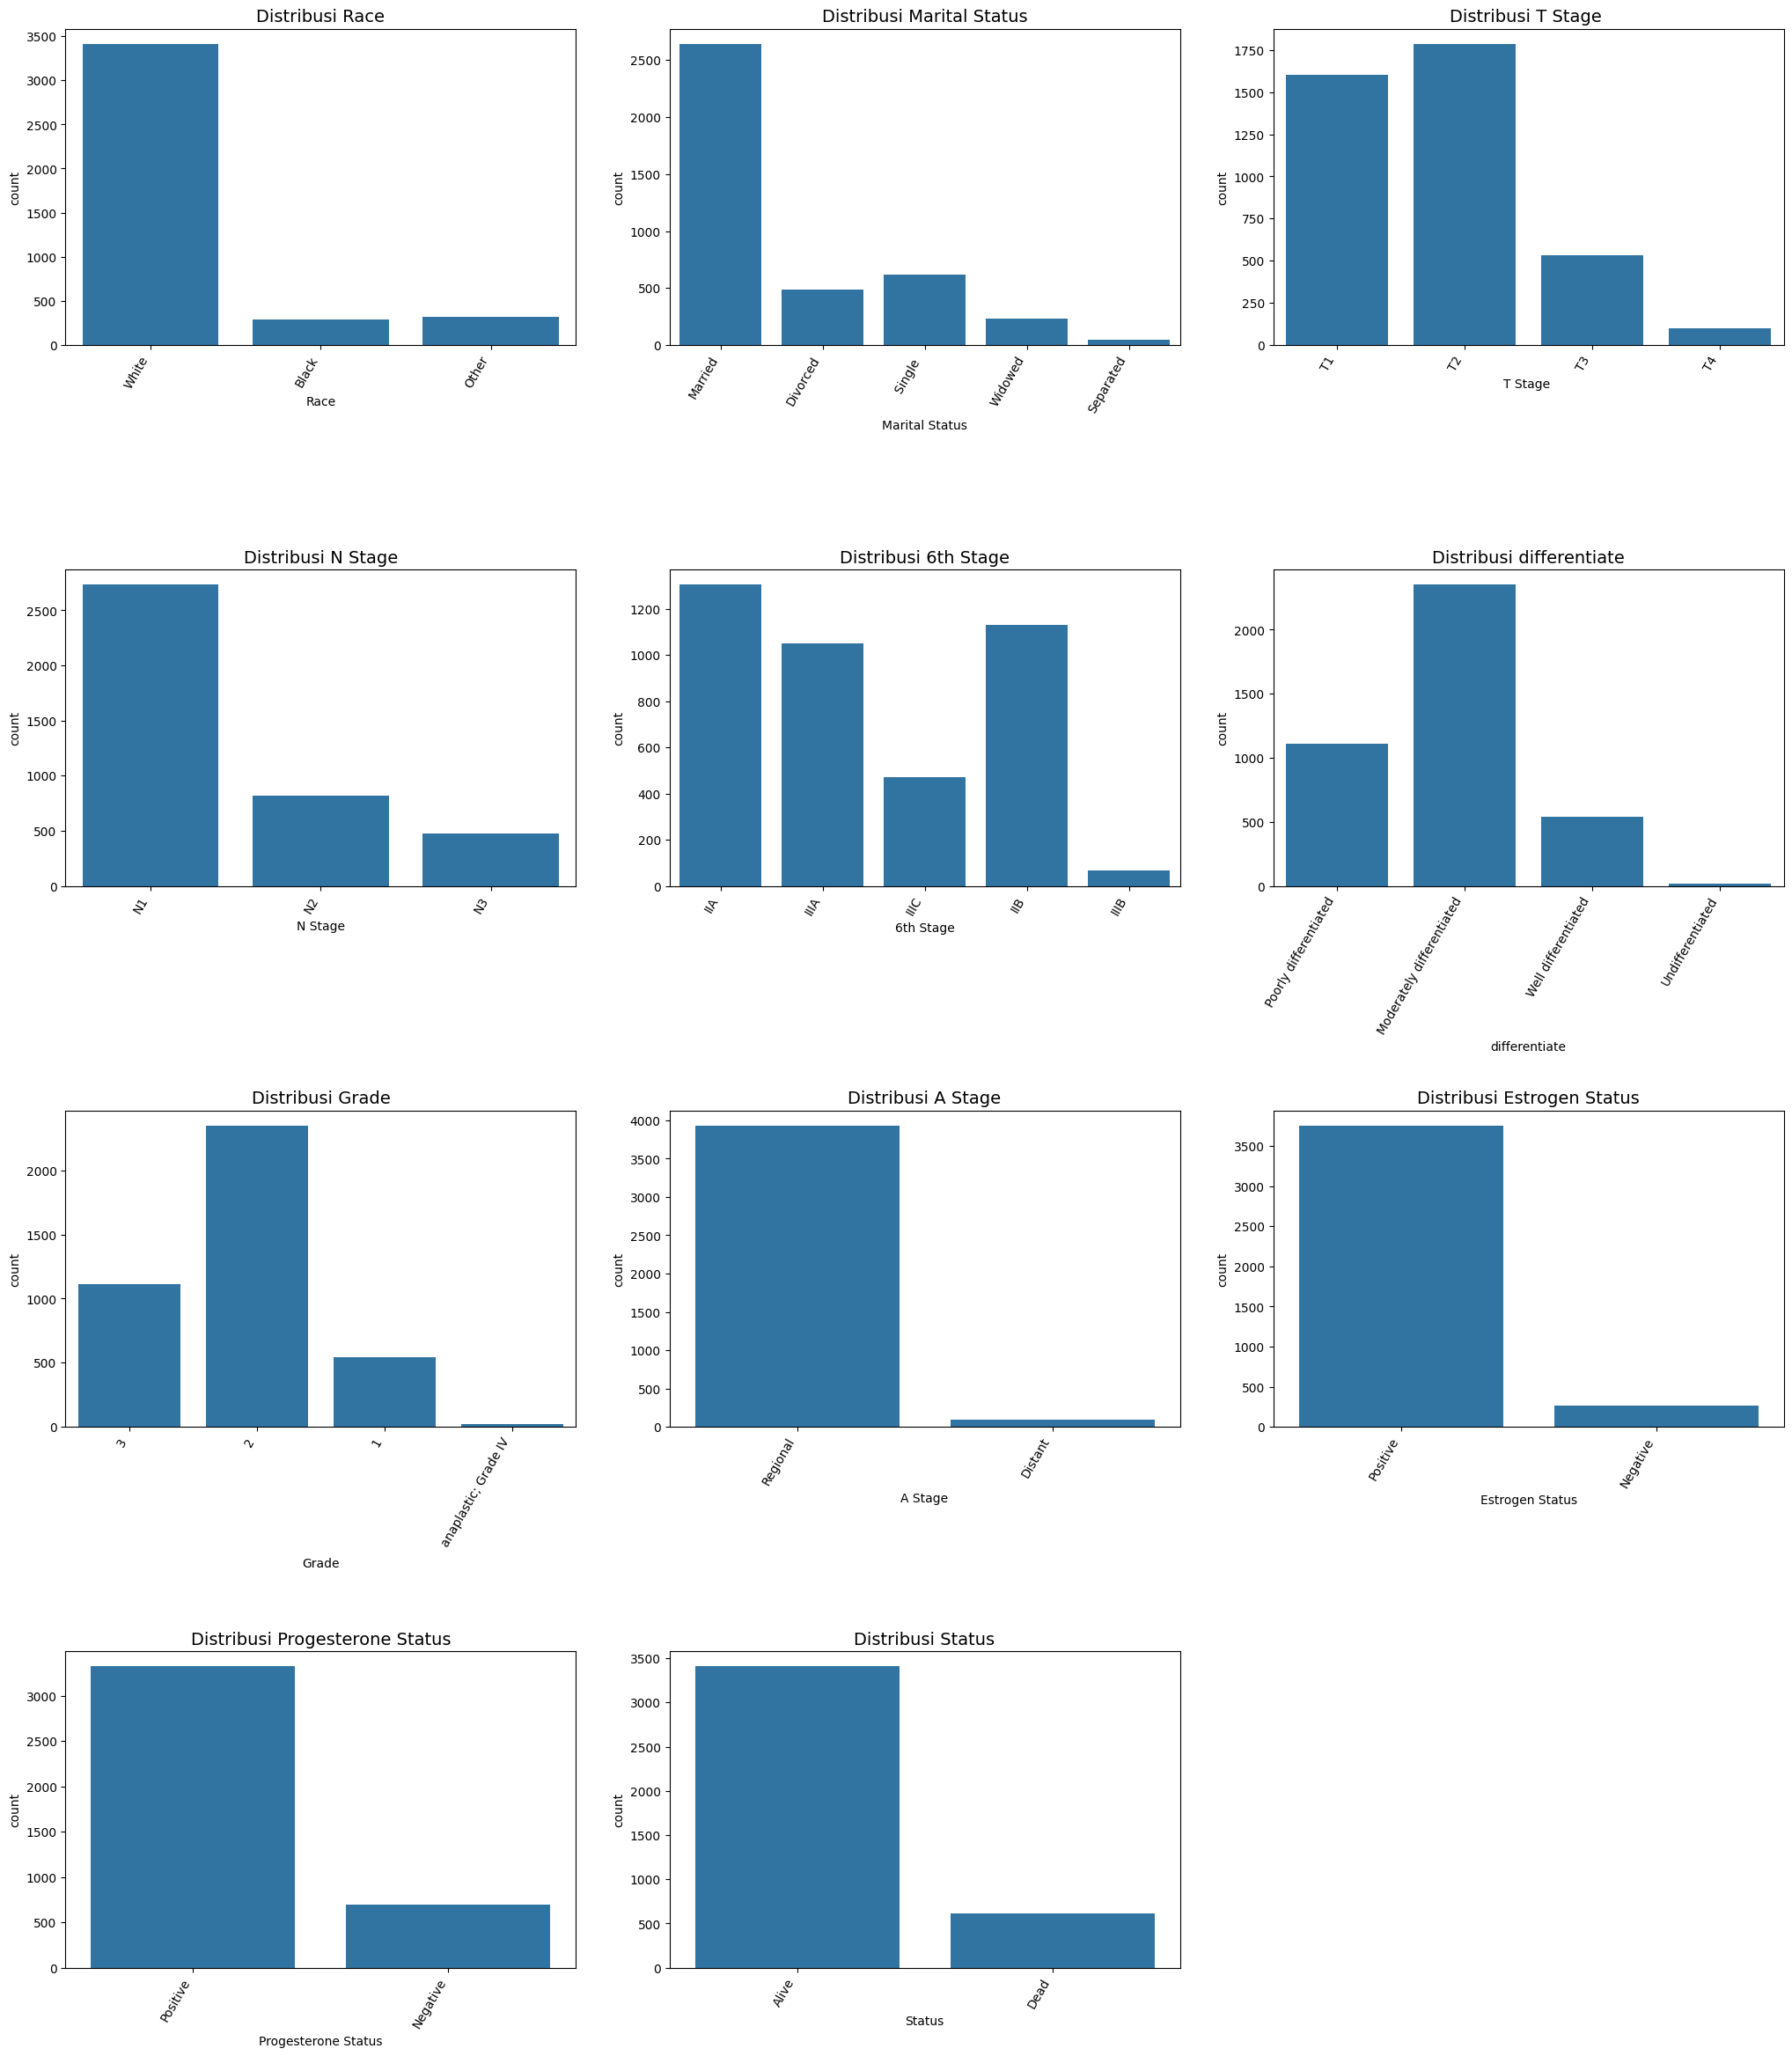

In [9]:
# Univariate analysis untuk kolom kategorikal

n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)

plt.figure(figsize=(n_cols * 7, n_rows * 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df_cancer, x=col)
    plt.title(f'Distribusi {col}', fontsize=14)
    plt.xticks(rotation=60, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout(pad=3)
plt.show()

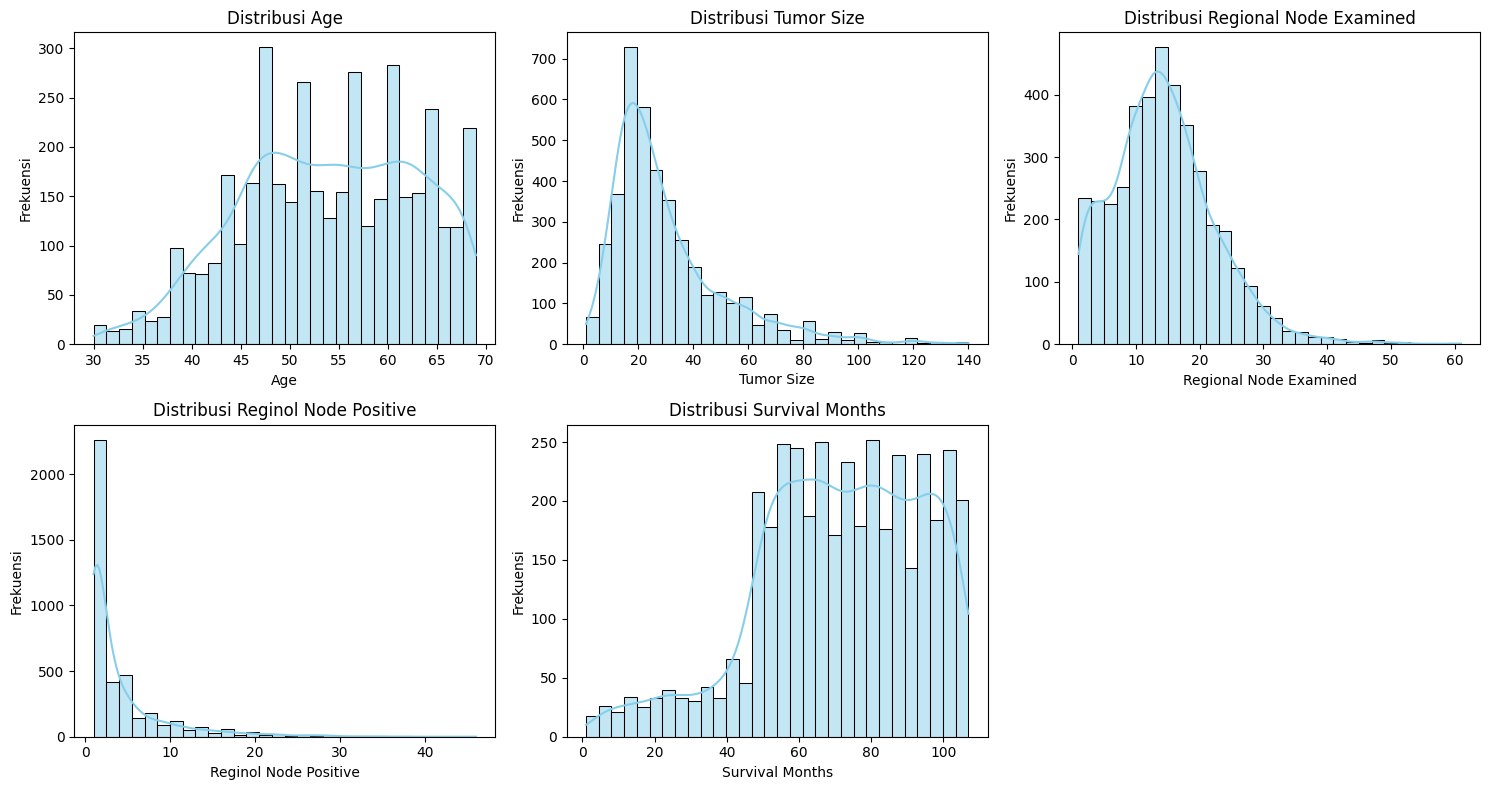

In [10]:
# Univariate analysis untuk kolom numerikal
n_cols = 3
n_rows = math.ceil(len(numerical_columns) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df_cancer, x=col, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


## Insight dari Distribusi Kolom Kategorikal

1. Distribusi *Race*

Mayoritas pasien berasal dari ras *White*, dengan jumlah yang sangat dominan dibandingkan ras lainnya seperti *Black* dan *Other*. Hal ini menunjukkan ketidakseimbangan distribusi ras dalam dataset.

2. Distribusi *Marital Status*

Sebagian besar pasien berstatus *menikah*, disusul oleh pasien *single*. Status lain seperti *bercerai*, *janda*, dan kategori lainnya memiliki jumlah yang jauh lebih rendah.

3. Distribusi *T Stage* (Tumor Stage)

Stadium tumor *T2* dan *T1* merupakan yang paling sering muncul pada pasien. Sementara itu, *T4* sangat jarang ditemukan, yang mengindikasikan sebagian besar pasien berada pada tahap awal atau menengah dari perkembangan tumor.

4. Distribusi *N Stage* (Node Stage)

Sebagian besar pasien berada pada *N0*, yang berarti tidak ada keterlibatan kelenjar getah bening. Diikuti oleh *N1* dan *N2*, hal ini menunjukkan bahwa mayoritas pasien belum mengalami penyebaran kanker ke nodus limfa.

5. Distribusi *6th Stage* (Stadium berdasarkan sistem TNM edisi ke-6)

Stadium *IIA*, *IIB*, dan *IIIA* mendominasi data, yang menunjukkan bahwa banyak pasien didiagnosis pada stadium menengah penyakit.

6. Distribusi *Differentiate* (Tingkat Diferensiasi Sel)

Mayoritas pasien memiliki tingkat *moderate differentiated*, yang berarti sel kanker masih memiliki kemiripan dengan jaringan normal, namun sudah mulai mengalami perubahan.

7. Distribusi *Grade*

Tingkat keparahan tumor terbanyak berada pada *Grade 2*, diikuti oleh *Grade 3* dan *Grade 1*. Ini mencerminkan bahwa kebanyakan pasien memiliki tingkat keparahan yang sedang.

8. Distribusi *A Stage*

Hampir seluruh pasien berada dalam kategori *staging regional*, yang berarti penyebaran kanker masih terbatas pada area regional tubuh, belum meluas secara sistemik.

9. Distribusi *Estrogen Status*

Sebagian besar pasien memiliki status estrogen yang *positif*. Ini umumnya terkait dengan prognosis yang lebih baik dan kemungkinan besar merespons pengobatan berbasis hormon.

10. Distribusi *Progesterone Status*

Distribusi status progesteron juga didominasi oleh yang *positif*, mirip dengan estrogen. Ini memperkuat kemungkinan terapi hormonal sebagai pendekatan pengobatan utama.

11. Distribusi *Status*

Jumlah pasien yang *masih hidup (Alive)* jauh lebih tinggi dibandingkan yang *meninggal (Dead)*. Ini menandakan tingkat kelangsungan hidup yang cukup baik dalam dataset ini.

## **Insight dari Distribusi Kolom Numerik**

1. Distribusi *Age*

Usia pasien dalam dataset berkisar antara *30 hingga 70 tahun*, dengan frekuensi tertinggi berada pada rentang *50–60 tahun*. Pola distribusinya cenderung normal namun sedikit miring ke kiri, menunjukkan lebih banyak pasien berada pada usia paruh baya.

2. Distribusi *Tumor Size*

Sebagian besar pasien memiliki ukuran tumor antara *10 hingga 30 mm*. Distribusi ukuran tumor sangat miring ke kanan (*right-skewed*), yang menunjukkan sebagian kecil pasien memiliki tumor berukuran sangat besar.

3. Distribusi *Regional Node Examined*

Jumlah node regional yang diperiksa berkisar antara *0 hingga 60*, dengan konsentrasi terbesar pada rentang *10–20 node*. Distribusinya mendekati normal dengan ekor panjang ke kanan.

4. Distribusi *Regional Node Positive*

Kebanyakan pasien memiliki *0 hingga 5 node positif*, dan mayoritas tidak memiliki node yang terinfeksi. Distribusinya sangat miring ke kanan, memperlihatkan bahwa sebagian besar kasus tidak mengalami penyebaran ke kelenjar getah bening.

5. Distribusi *Survival Months*

Lama bertahan hidup pasien umumnya berada pada rentang *50–100 bulan*, dengan frekuensi tinggi antara *60–100 bulan*. Distribusinya miring ke kiri (*left-skewed*), menunjukkan bahwa banyak pasien bertahan hidup dalam jangka waktu yang cukup lama.

### **Kesimpulan**

Dataset ini menunjukkan bahwa sebagian besar pasien berasal dari ras kulit putih, berstatus menikah, dan memiliki tumor pada stadium menengah seperti *T1/T2*, *N0/N1*, serta stadium *IIA/IIB/IIIA*. Karakteristik tumor pada umumnya sedang dari sisi diferensiasi dan tingkat keparahan (*grade*). Sebagian besar pasien juga memiliki status hormon estrogen dan progesteron yang positif, yang mengindikasikan potensi respon yang baik terhadap terapi hormonal. Usia pasien terkonsentrasi antara *50–60 tahun*, ukuran tumor relatif kecil, dan penyebaran ke kelenjar getah bening tidak terlalu umum. Tingkat kelangsungan hidup tergolong tinggi dengan mayoritas pasien bertahan hidup lebih dari *60 bulan*.


## Bivariate Analysis

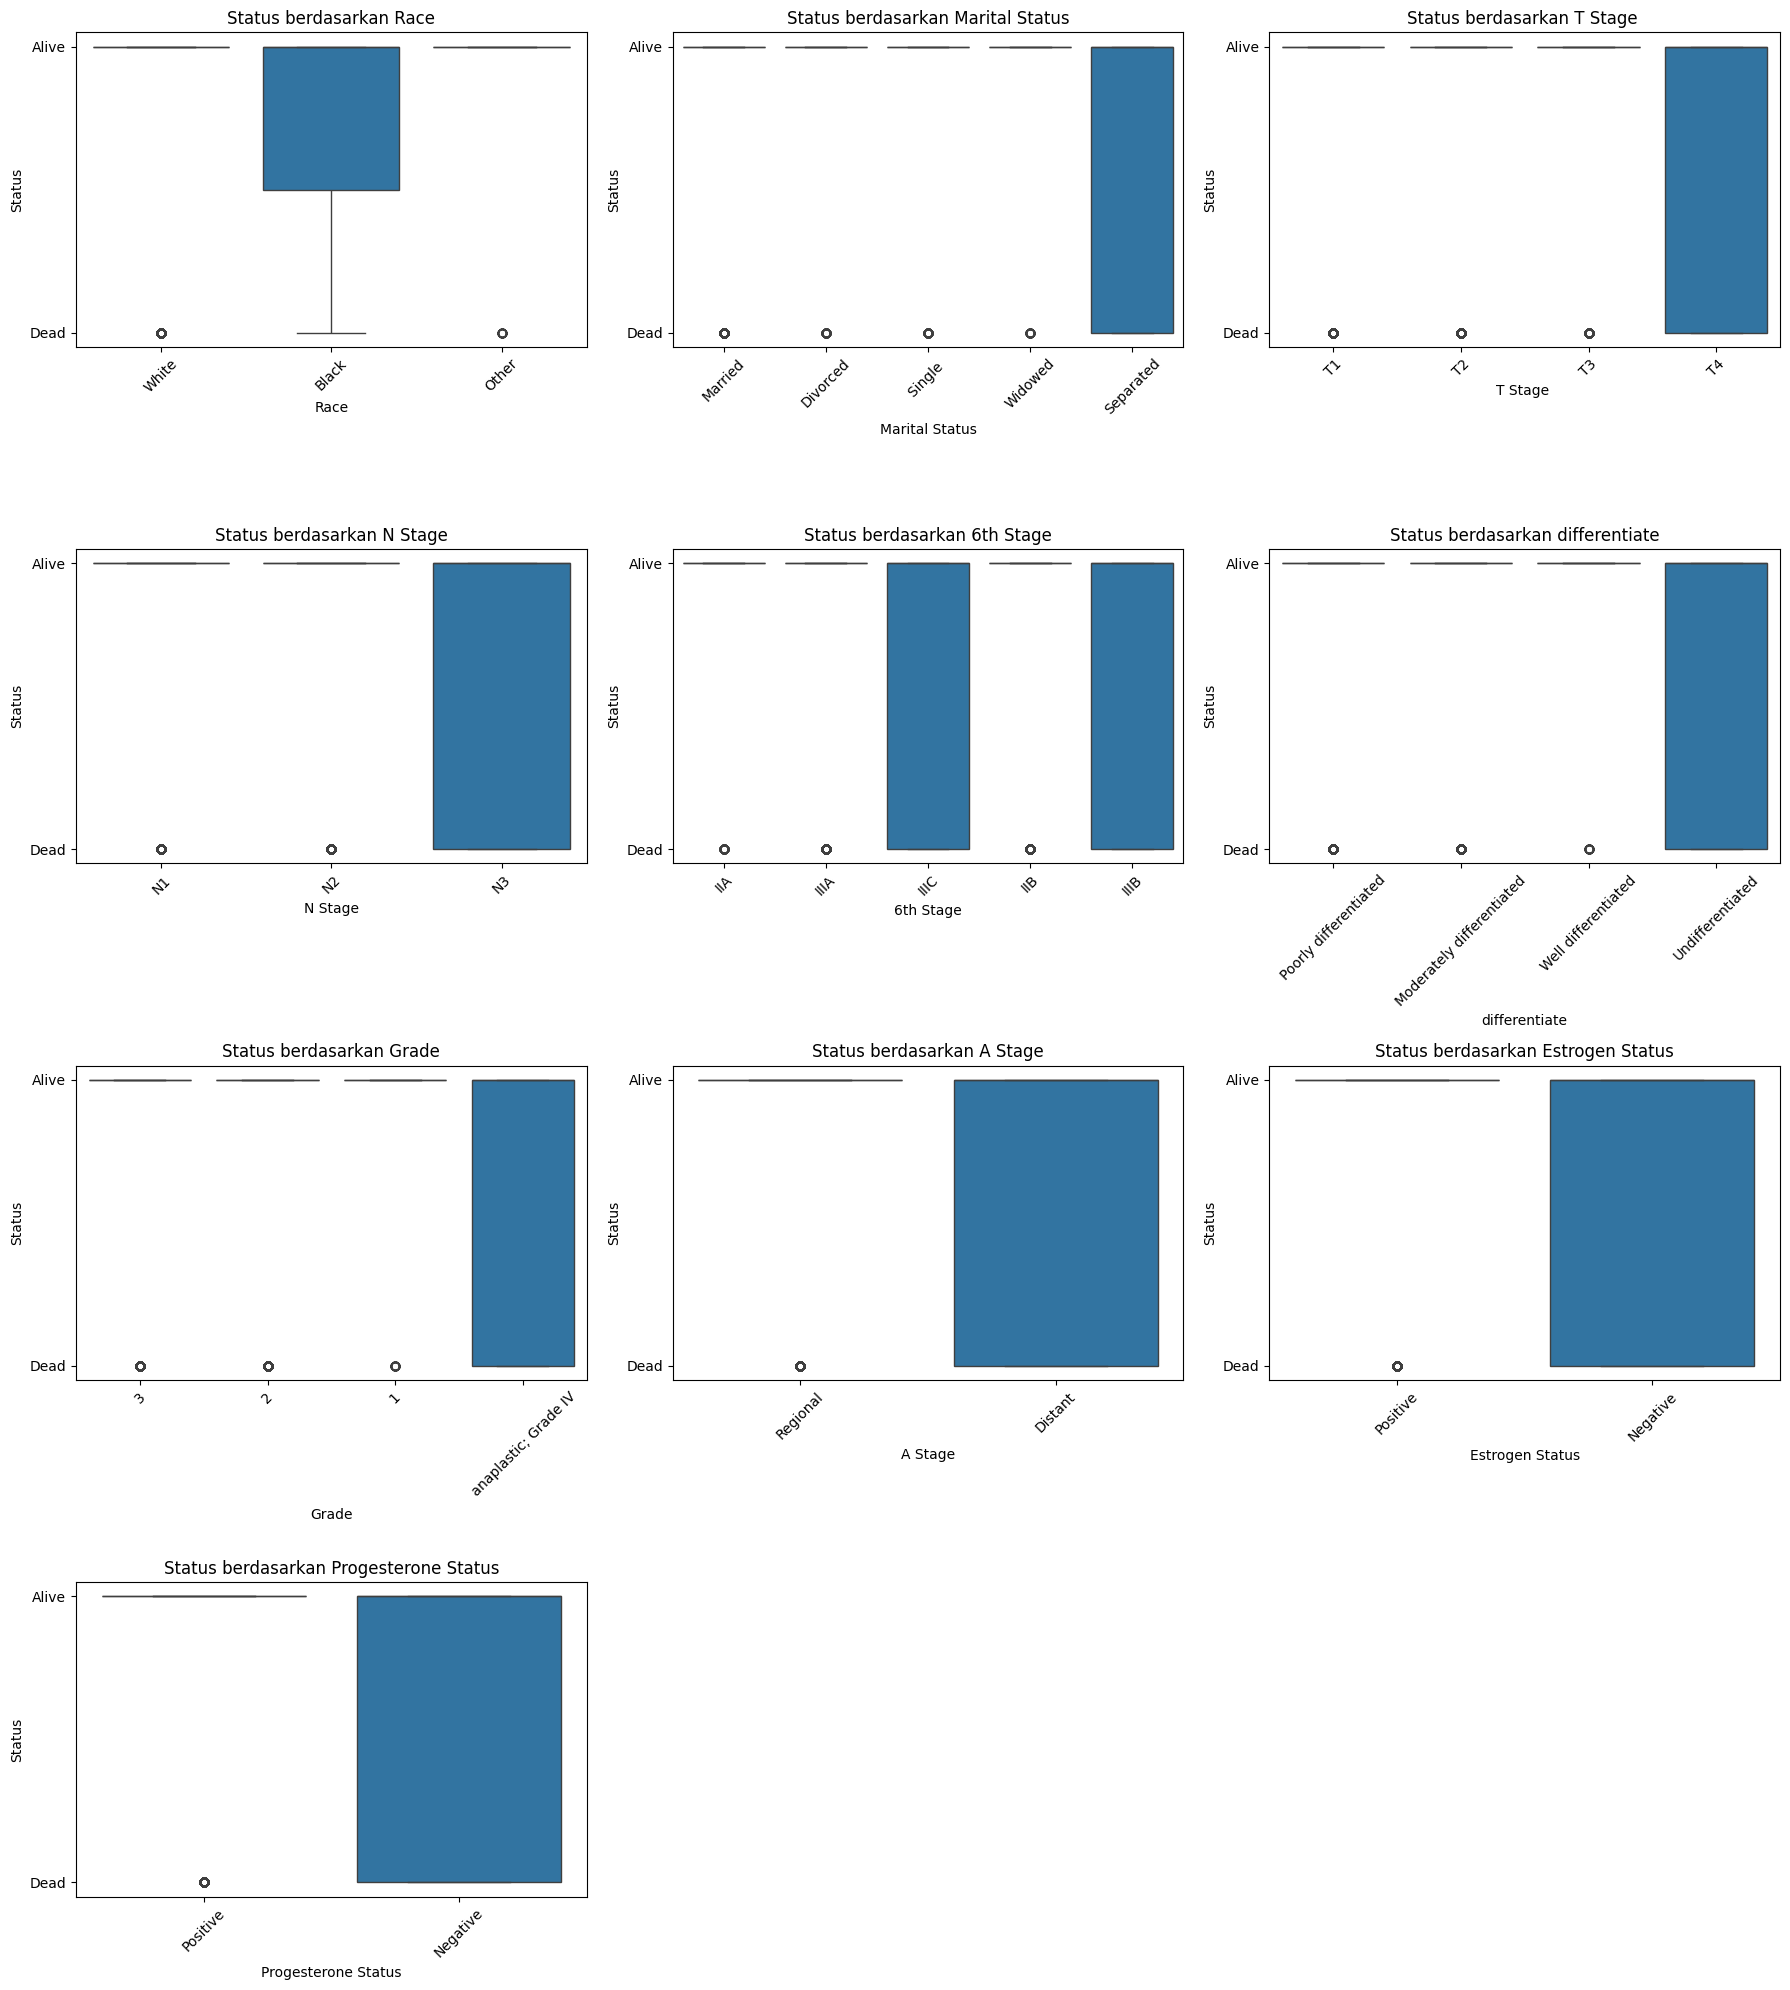

In [11]:
# Bivariate Analysis: Kolom Kategorikal terhadap target Status
categorical_columns=['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status']

ncols = 3
nrows = (len(categorical_columns) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 5 * nrows))

# Bungkus axes menjadi list jika hanya satu kolom
if len(categorical_columns) == 1:
    axes = [axes]

# Flatten axes agar dapat mengaksesnya dengan indeks tunggal
axes = axes.flatten()

# Loop setiap kolom kategorikal dan plot boxplot ke subplot masing-masing
for i, col in enumerate(categorical_columns):
    sns.boxplot(x=col, y='Status', data=df_cancer, ax=axes[i])
    axes[i].set_title(f'Status berdasarkan {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hapus subplot yang tidak digunakan jika ada
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


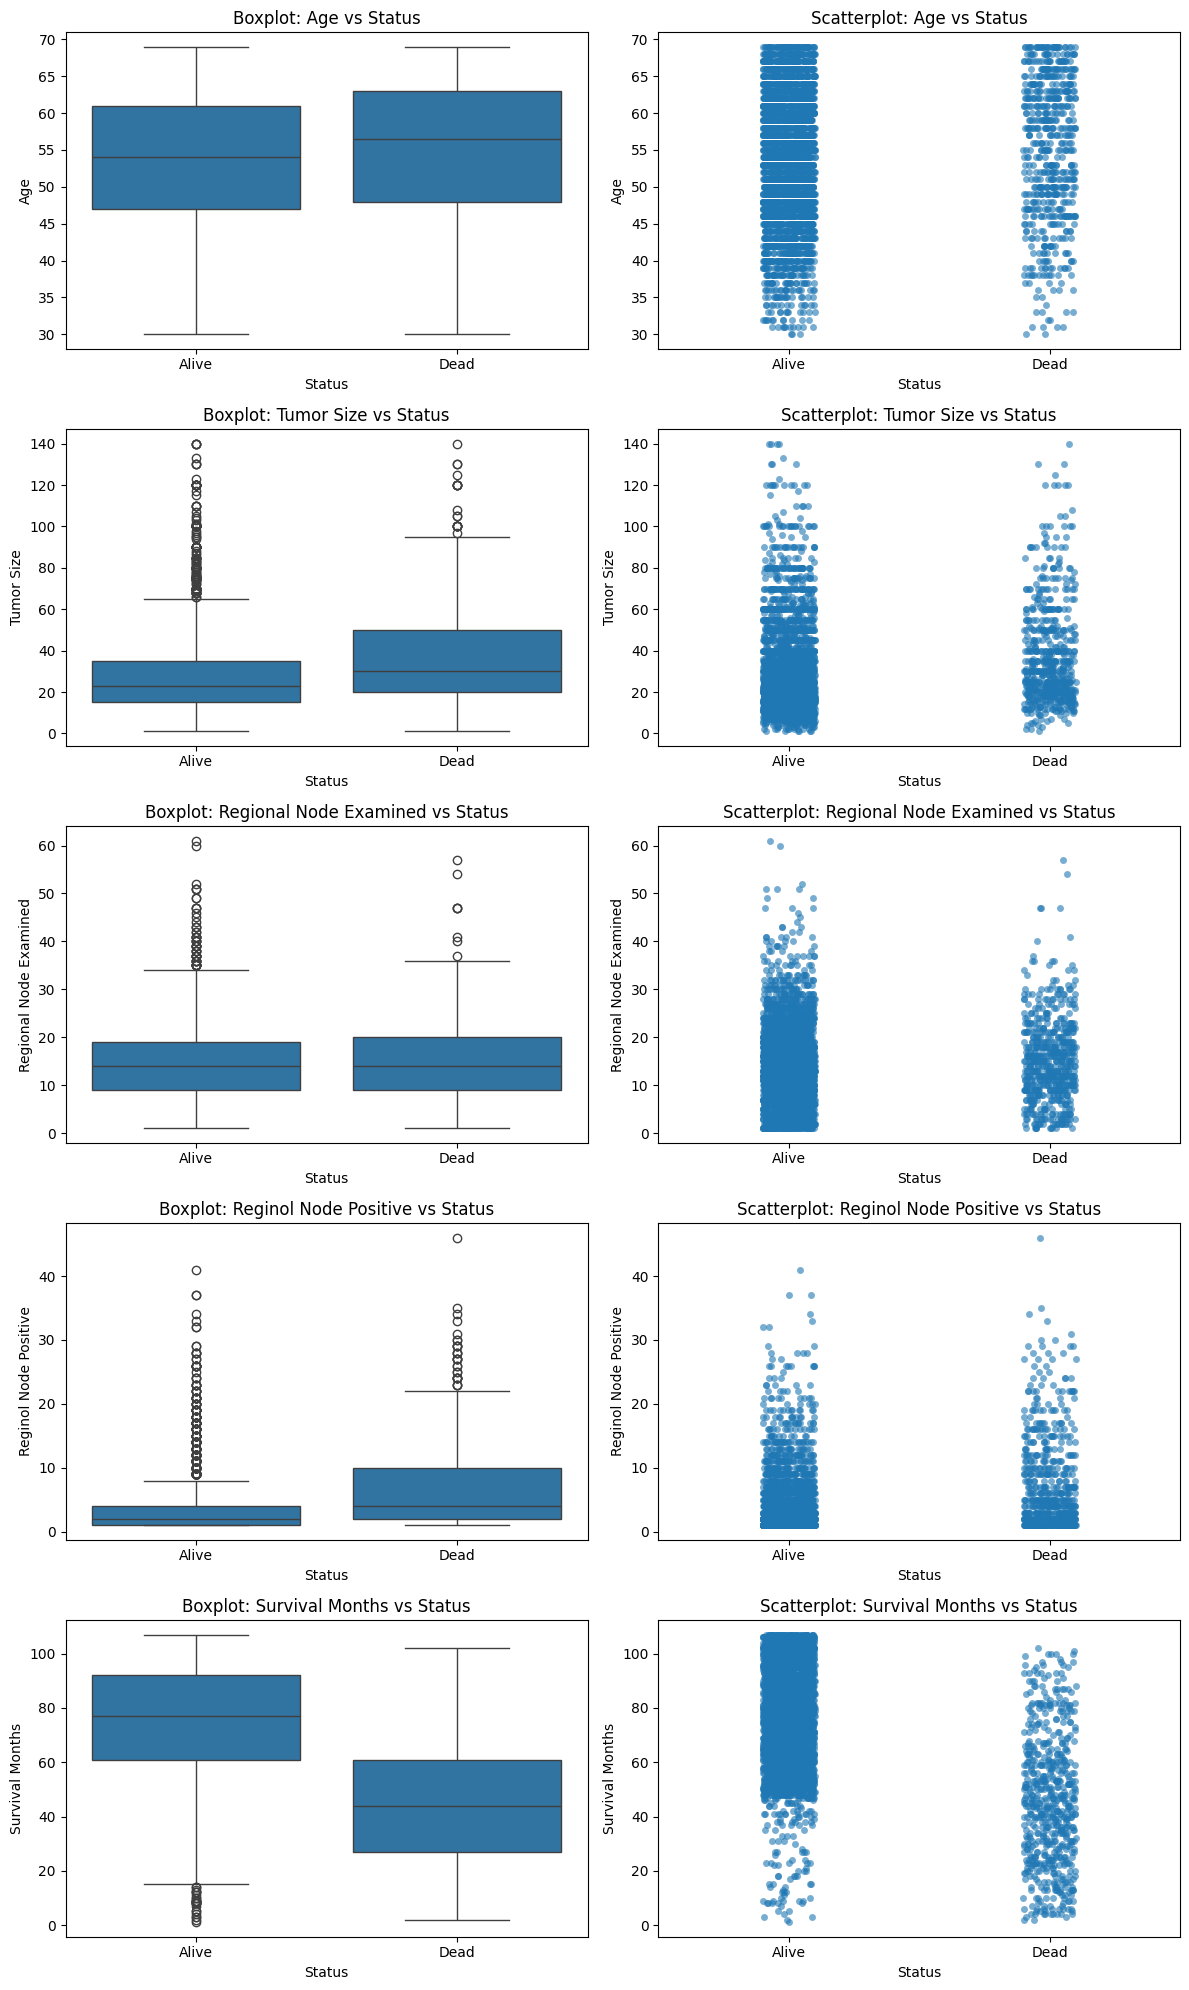

In [12]:
# Bivariate Analysis: Kolom Numerik terhadap target Status

n_cols = 2
n_rows = len(numerical_columns)

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(numerical_columns):
    # Boxplot
    plt.subplot(n_rows, n_cols, 2*i + 1)
    sns.boxplot(data=df_cancer, x='Status', y=col)
    plt.title(f'Boxplot: {col} vs Status')

    # Scatterplot
    plt.subplot(n_rows, n_cols, 2*i + 2)
    sns.stripplot(data=df_cancer, x='Status', y=col, jitter=True, alpha=0.6)
    plt.title(f'Scatterplot: {col} vs Status')

plt.tight_layout()
plt.show()

## Bivariate Analysis terhadap Target (Status)

### Analisis Variabel Kategorikal Terhadap Status

1. **Race & Marital Status**
   - Sebagian besar pasien berasal dari ras 'White' dan status menikah (`Married`) cenderung mendominasi kelompok yang masih hidup.

2. **T Stage & N Stage**
   - Pasien dengan stadium tumor awal (`T1`, `N0`) memiliki proporsi yang lebih besar dalam kelompok hidup.
   - Stadium lanjut seperti `T3`, `N2` lebih banyak ditemukan pada pasien yang meninggal.

3. **6th Stage**
   - Stadium `IIA` dan `IIB` lebih dominan pada pasien meninggal, sedangkan `IA` dan `IB` pada pasien hidup.

4. **Differentiate (Tingkat Diferensiasi Sel)**
   - Tingkat diferensiasi yang buruk (`Poorly differentiated`, `Undifferentiated`) lebih banyak ditemukan pada pasien yang meninggal.
   - Sel yang `Well differentiated` lebih umum pada pasien hidup, menunjukkan bahwa agresivitas kanker mempengaruhi kelangsungan hidup.

5. **Grade**
   - Grade yang lebih tinggi (3 dan 4) berasosiasi dengan kematian lebih tinggi.

6. **A Stage**
   - Stage `Distant` (penyebaran jauh) memiliki korelasi kuat dengan status meninggal.

7. **Estrogen & Progesterone Status**
   - Status hormon `Negative` (baik estrogen maupun progesteron) tampak lebih banyak pada pasien yang meninggal.
   - Status `Positive` berkorelasi dengan tingkat kelangsungan hidup yang lebih tinggi, kemungkinan karena respons terhadap terapi hormonal.

### Analisis Variabel Numerikal Terhadap Status

1. **Age vs Status**
   - Rata-rata umur pasien yang meninggal sedikit lebih tinggi dibandingkan yang masih hidup.
   - Namun distribusinya mirip dan terdapat overlap yang signifikan.

2. **Tumor Size vs Status**
   - Pasien yang meninggal cenderung memiliki ukuran tumor lebih besar.
   - Distribusi ukuran tumor untuk pasien yang meninggal memiliki rentang yang lebih luas dan banyak outlier.

3. **Regional Node Examined vs Status**
   - Jumlah node yang diperiksa relatif mirip antara dua kelompok, meskipun pasien yang meninggal sedikit lebih banyak menjalani pemeriksaan node.

4. **Regional Node Positive vs Status**
   - Pasien yang meninggal memiliki jumlah node positif yang lebih tinggi, menunjukkan penyebaran kanker yang lebih luas.

5. **Survival Months vs Status**
   - Terlihat jelas bahwa pasien yang masih hidup memiliki waktu survival yang jauh lebih panjang.
   - Distribusi waktu survival pasien meninggal cenderung lebih rendah dan terpusat di bawah 60 bulan.

### Kesimpulan
- **Faktor-faktor yang berkontribusi terhadap kematian pasien** antara lain: ukuran tumor yang besar, jumlah node positif yang tinggi, stadium lanjut (T, N, 6th Stage, A Stage), grade tinggi, serta status hormon negatif.
- Faktor-faktor tersebut dapat dijadikan pertimbangan dalam membangun model prediksi kelangsungan hidup pasien kanker dan menentukan prioritas pengobatan.


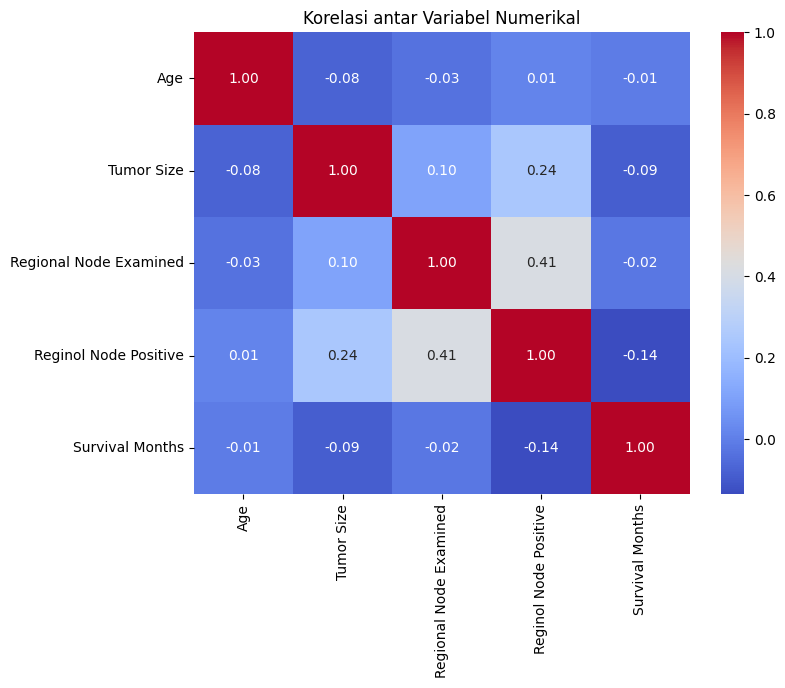

In [13]:
# Korelasi antar variabel numerikal
plt.figure(figsize=(8, 6))
sns.heatmap(df_cancer[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar Variabel Numerikal')
plt.show()

### Insight Korelasi Antar Variabel Numerik

Berdasarkan hasil heatmap korelasi antar variabel numerik, sebagian besar variabel menunjukkan korelasi yang lemah satu sama lain, dengan nilai korelasi mendekati nol. Korelasi tertinggi terjadi antara **Regional Node Examined** dan **Regional Node Positive** dengan nilai sekitar **0.41**, yang menunjukkan adanya hubungan positif moderat. Hal ini mengindikasikan bahwa semakin banyak node limfa yang diperiksa, maka kemungkinan ditemukan node yang positif juga meningkat. Korelasi positif yang lemah juga terlihat antara **Tumor Size** dan **Regional Node Positive** (sekitar 0.24), menandakan bahwa tumor dengan ukuran yang lebih besar cenderung dikaitkan dengan jumlah node positif yang lebih banyak.

Sementara itu, variabel **Survival Months** menunjukkan korelasi negatif terhadap hampir semua variabel numerik lainnya, meskipun dengan kekuatan yang lemah. Korelasi negatif paling tinggi terlihat dengan **Regional Node Positive** (-0.14), yang memberikan indikasi bahwa semakin banyak node positif, maka rata-rata masa bertahan hidup cenderung lebih rendah. Korelasi dengan **Tumor Size** dan **Age** juga negatif, namun sangat kecil dan kemungkinan tidak terlalu signifikan secara linier.

Secara keseluruhan, meskipun tidak ada hubungan linier yang sangat kuat antar variabel numerik, beberapa pola hubungan tetap memberikan informasi yang penting, khususnya dalam konteks prediksi dan analisis risiko terhadap status atau kondisi pasien.


# **Data Preparation**

## Menangani Outliers

In [14]:
# Fungsi untuk mendeteksi baris non-outlier (bernilai True untuk baris yang valid)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] >= lower_bound) & (df[column] <= upper_bound)

# Daftar kolom numerik yang ingin ditangani outlier-nya
numerical_columns = [
    'Tumor Size',
    'Regional Node Examined',
    'Reginol Node Positive',
    'Survival Months'
]

# Buat mask gabungan dari semua kolom
mask = pd.Series(True, index=df_cancer.index)
for column in numerical_columns:
    mask &= detect_outliers_iqr(df_cancer, column)

# Terapkan mask ke dataset
df_cancer_clean = df_cancer[mask]

# Verifikasi bentuk data setelah penghapusan outlier
print("Ukuran dataset setelah penghapusan outlier:", df_cancer_clean.shape)



Ukuran dataset setelah penghapusan outlier: (3444, 16)


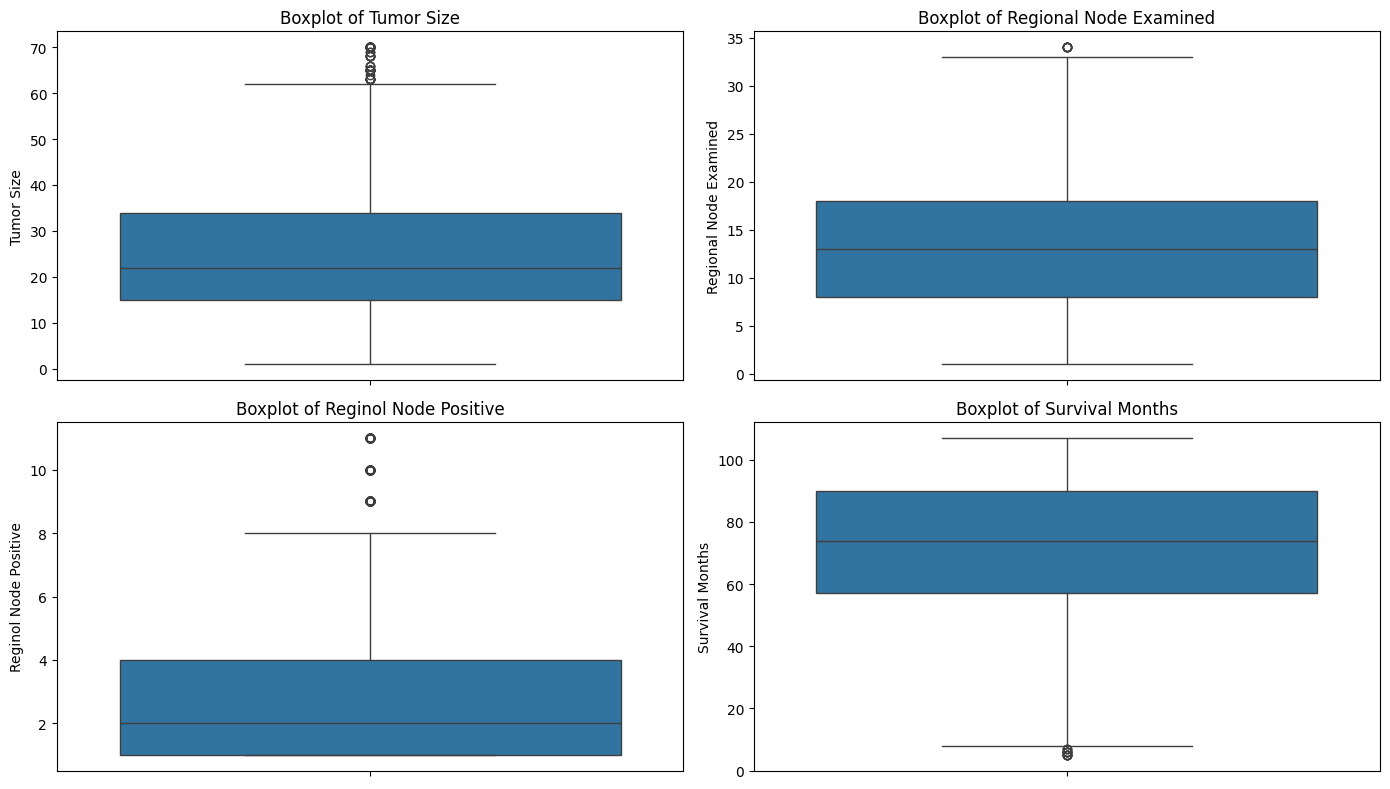

In [15]:
# Menampilkan boxplot untuk masing-masing kolom numerik setelah outlier dihapus
plt.figure(figsize=(14, 8))

numerical_columns = [
    'Tumor Size',
    'Regional Node Examined',
    'Reginol Node Positive',
    'Survival Months'
]

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_cancer_clean, y=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### Insight Setelah Penghapusan Outliers

Setelah dilakukan analisis boxplot terhadap variabel *Tumor Size*, *Regional Node Examined*, *Regional Node Positive*, dan *Survival Months*, ditemukan adanya sejumlah outliers pada masing-masing variabel. Outliers ini dapat memengaruhi distribusi data dan hasil analisis statistik atau pemodelan yang dilakukan.

Penghapusan outliers dilakukan untuk menjaga kualitas data dan meningkatkan akurasi model dengan menghilangkan nilai-nilai ekstrem yang tidak merepresentasikan mayoritas data. Berdasarkan visualisasi boxplot yang ditampilkan setelah pembersihan, distribusi data menjadi lebih terfokus dan representatif terhadap kondisi umum populasi.


## Encoding Fitur Kategorikal

In [16]:
# Salin dataframe yang sudah bersih dari outlier
df_encoded = df_cancer_clean.copy()

# Binary Encoding
df_encoded['Status'] = df_encoded['Status'].map({'Alive': 1, 'Dead': 0})

# One-hot Encoding untuk fitur kategorikal lainnya
df_encoded = pd.get_dummies(df_encoded, columns=['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status'], drop_first=True)

# Tampilkan 5 baris pertama untuk verifikasi
df_encoded.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,...,6th Stage_IIIC,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive
0,68,4,24,1,60,1,False,True,True,False,...,False,True,False,False,False,False,True,True,True,True
1,50,35,14,5,62,1,False,True,True,False,...,False,False,False,False,False,True,False,True,True,True
2,58,63,14,7,75,1,False,True,False,False,...,True,False,False,False,False,True,False,True,True,True
3,58,18,2,1,84,1,False,True,True,False,...,False,True,False,False,False,False,True,True,True,True
4,47,41,3,1,50,1,False,True,True,False,...,False,True,False,False,False,False,True,True,True,True


## Ovesampling Dataset

Dalam dataset awal, terdapat ketidakseimbangan jumlah data antara kelas **alive** dan **dead**:

- Alive: 3.022 data  
- Dead: 442 data  

Ketidakseimbangan ini membuat model cenderung **bias terhadap kelas mayoritas** (alive), karena model akan lebih sering belajar dari data yang lebih banyak jumlahnya.

Untuk mengatasi masalah ini, dilakukan teknik **oversampling**, yaitu menambahkan jumlah data pada kelas minoritas (dead) agar seimbang dengan jumlah data pada kelas mayoritas (alive).


In [17]:
# Cek jumlah data berdasarkan status

print("\nJumlah data per kelas:")
print("Alive:", (df_encoded['Status'] == 1).sum())
print("Dead :", (df_encoded['Status'] == 0).sum())



Jumlah data per kelas:
Alive: 3022
Dead : 422


In [18]:
# Inisialisasi RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Define X and y from the df_encoded dataframe
X = df_encoded.drop('Status', axis=1) # Features are all columns except 'Status'
y = df_encoded['Status']             # The target variable is 'Status'

# Terapkan oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

In [19]:
# Jumlah dataset setelah oversampling
print("Jumlah data per kelas setelah oversampling:")
print(y_resampled.value_counts())

# Proporsi per kelas
print("\nProporsi per kelas setelah oversampling:")
print(y_resampled.value_counts(normalize=True))



Jumlah data per kelas setelah oversampling:
Status
1    3022
0    3022
Name: count, dtype: int64

Proporsi per kelas setelah oversampling:
Status
1    0.5
0    0.5
Name: proportion, dtype: float64


## Split Dataset

In [20]:
# Split data hasil oversampling
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Verifikasi ukuran hasil pembagian
print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)


Ukuran data latih: (4835, 29)
Ukuran data uji: (1209, 29)


## Standarisasi Fitur Numerik

In [21]:
# Daftar fitur numerik yang akan distandarisasi
numerical_features = ['Age', 'Tumor Size', 'Regional Node Examined',
                      'Reginol Node Positive', 'Survival Months']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Lakukan standarisasi pada data latih dan data uji
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Verifikasi hasil standarisasi
print("Fitur numerik setelah standarisasi (data latih):")
X_train[numerical_features].head()

Fitur numerik setelah standarisasi (data latih):


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
5677,-1.697219,0.850395,2.499966,1.372235,-1.037964
3941,-1.697219,-0.593257,-0.286386,2.100209,-1.314538
1094,-0.828784,2.912754,2.639284,-0.811688,1.569735
1121,-0.177459,-1.280710,-0.007751,0.644261,1.767288
1770,-0.937339,1.194121,-0.982975,-0.083713,0.502949


In [22]:
# Cek nilai mean dan standar deviasi pada data latih yang sudah distandarisasi
print("Mean dari fitur numerik (data latih setelah standarisasi):")
print(X_train[numerical_features].mean())

print("\nStandar deviasi dari fitur numerik (data latih setelah standarisasi):")
print(X_train[numerical_features].std())


Mean dari fitur numerik (data latih setelah standarisasi):
Age                       7.568346e-17
Tumor Size                8.229657e-17
Regional Node Examined   -3.673954e-17
Reginol Node Positive    -1.080143e-16
Survival Months           1.418146e-16
dtype: float64

Standar deviasi dari fitur numerik (data latih setelah standarisasi):
Age                       1.000103
Tumor Size                1.000103
Regional Node Examined    1.000103
Reginol Node Positive     1.000103
Survival Months           1.000103
dtype: float64


# **Modeling**

### Tahapan Modeling Menggunakan LazyPredict

Pada tahap modeling, digunakan library `LazyPredict` untuk melakukan eksplorasi awal terhadap berbagai algoritma machine learning secara otomatis. Pendekatan ini bertujuan untuk membandingkan performa beberapa model secara cepat dan efisien tanpa perlu menulis kode training untuk setiap model satu per satu.

Melalui LazyPredict, diperoleh hasil evaluasi awal dari berbagai model seperti nilai akurasi, f1-score, ROC AUC, dan balanced accuracy. Dari hasil ini, dipilih beberapa model terbaik berdasarkan kriteria evaluasi tertentu untuk kemudian dilakukan pelatihan (training) dan evaluasi secara manual dan lebih mendalam.

Penggunaan `LazyPredict`ini sangat membantu dalam menyaring model-model yang memiliki potensi terbaik, sehingga proses modeling dapat difokuskan pada model yang paling relevan dengan karakteristik data yang digunakan.


In [23]:
pip install lazypredict


In [24]:
from lazypredict.Supervised import LazyClassifier

# Buat objek LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit dan evaluasi banyak model sekaligus
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Tampilkan performa semua model
print(models)


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 2424, number of negative: 2411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 4835, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501344 -> initscore=0.005377
[LightGBM] [Info] Start training from score 0.005377
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.99               0.99     0.99      0.99   
RandomForestClassifier             0.98               0.98     0.98      0.98   
XGBClassifier                      0.97               0.97     0.97      0.97   
DecisionTreeClassifier             0.96               0.96     0.96      0.96   
BaggingClassifier          

### Pemilihan 5 Model Terbaik Berdasarkan LazyPredict

Berdasarkan hasil eksplorasi model menggunakan LazyPredict terhadap data yang telah di oversampling dengan rasio 1:1 (dead:alive = 3022:3022) berikut adalah 5 model terbaik yang dipilih:

1. ExtraTreesClassifier
2. RandomForestClassifier
3. XGBClassifier
4. DecisionTreeClassifier
5. BaggingClassifier

In [25]:
# Model 1: ExtraTreesClassifier
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)
y_pred_et = et_model.predict(X_test)


In [26]:
# Model 2: RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [27]:

# Model 3: XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)





In [28]:
# Model 4: DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)




In [29]:
# Model 5: BaggingClassifier
bag_model = BaggingClassifier(random_state=42)
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)



# **Evaluasi Model**

Evaluasi Model: ExtraTreesClassifier
Accuracy : 0.99
Precision: 0.99
Recall   : 0.97
F1 Score : 0.98
True Positives (TP): 583
True Negatives (TN): 608
False Positives (FP): 3
False Negatives (FN): 15

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       611
           1       0.99      0.97      0.98       598

    accuracy                           0.99      1209
   macro avg       0.99      0.99      0.99      1209
weighted avg       0.99      0.99      0.99      1209



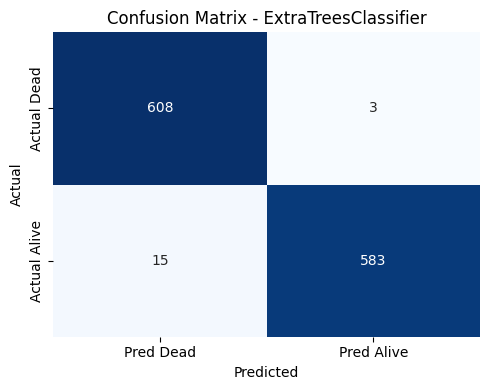

Evaluasi Model: RandomForestClassifier
Accuracy : 0.98
Precision: 1.00
Recall   : 0.97
F1 Score : 0.98
True Positives (TP): 578
True Negatives (TN): 611
False Positives (FP): 0
False Negatives (FN): 20

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       611
           1       1.00      0.97      0.98       598

    accuracy                           0.98      1209
   macro avg       0.98      0.98      0.98      1209
weighted avg       0.98      0.98      0.98      1209



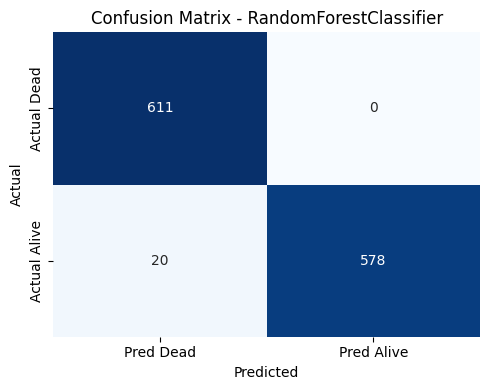

Evaluasi Model: XGBClassifier
Accuracy : 0.97
Precision: 0.99
Recall   : 0.95
F1 Score : 0.97
True Positives (TP): 570
True Negatives (TN): 608
False Positives (FP): 3
False Negatives (FN): 28

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       611
           1       0.99      0.95      0.97       598

    accuracy                           0.97      1209
   macro avg       0.98      0.97      0.97      1209
weighted avg       0.98      0.97      0.97      1209



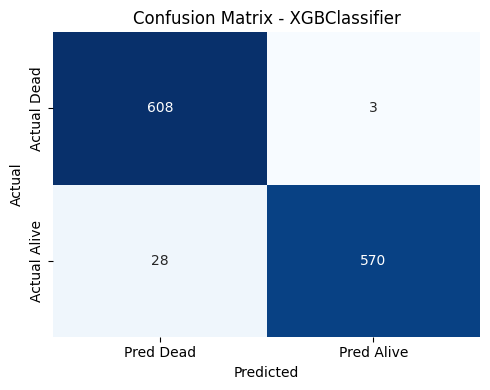

Evaluasi Model: DecisionTreeClassifier
Accuracy : 0.95
Precision: 1.00
Recall   : 0.89
F1 Score : 0.94
True Positives (TP): 532
True Negatives (TN): 611
False Positives (FP): 0
False Negatives (FN): 66

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       611
           1       1.00      0.89      0.94       598

    accuracy                           0.95      1209
   macro avg       0.95      0.94      0.95      1209
weighted avg       0.95      0.95      0.95      1209



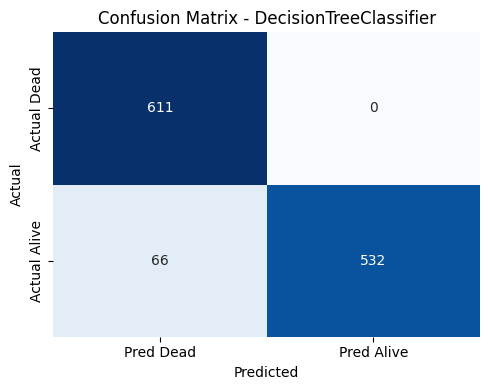

Evaluasi Model: BaggingClassifier
Accuracy : 0.97
Precision: 1.00
Recall   : 0.93
F1 Score : 0.96
True Positives (TP): 557
True Negatives (TN): 611
False Positives (FP): 0
False Negatives (FN): 41

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       611
           1       1.00      0.93      0.96       598

    accuracy                           0.97      1209
   macro avg       0.97      0.97      0.97      1209
weighted avg       0.97      0.97      0.97      1209



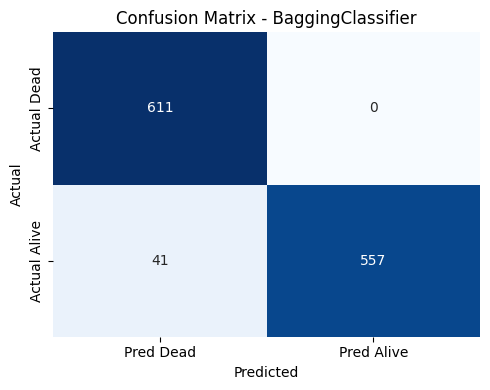

In [30]:
# Dictionary prediksi model
model_predictions = {
    "ExtraTreesClassifier": y_pred_et,
    "RandomForestClassifier": y_pred_rf,
    "XGBClassifier": y_pred_xgb,
    "DecisionTreeClassifier": y_pred_dt,
    "BaggingClassifier": y_pred_bag,
}

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred Dead', 'Pred Alive'],
                yticklabels=['Actual Dead', 'Actual Alive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Evaluasi masing-masing model
for model_name, y_pred in model_predictions.items():
    print(f"Evaluasi Model: {model_name}")

    # Skor umum
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion Matrix details
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print(f"Accuracy : {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1 Score : {f1:.2f}")
    print(f"True Positives (TP): {tp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Tampilkan Confusion Matrix langsung setelah evaluasi
    plot_confusion_matrix(y_test, y_pred, model_name)
    print("="*70)


### Kesimpulan Evaluasi Model Klasifikasi

Evaluasi dilakukan terhadap lima model klasifikasi untuk memprediksi dua kelas (0 dan 1). Masing-masing model diuji menggunakan metrik evaluasi seperti precision, recall, f1-score, dan accuracy. Berikut adalah kesimpulan yang diperoleh:

#### 1. ExtraTreesClassifier
- **Akurasi:** 99%
- **Kelas 1:** precision 0.99, recall 0.97, f1-score 0.98
- **Kelas 0:** precision 0.98, recall 1.00, f1-score 0.99
- **Kesimpulan:** ExtraTreesClassifier menjadi model dengan performa terbaik secara keseluruhan. Akurasi dan f1-score sangat tinggi pada kedua kelas, dengan kesalahan klasifikasi (false positive dan false negative) yang sangat kecil.

#### 2. RandomForestClassifier
- **Akurasi:** 98%
- **Kelas 1:** precision 1.00, recall 0.97, f1-score 0.98
- **Kelas 0:** precision 0.97, recall 1.00, f1-score 0.98
- **Kesimpulan:** Model ini memberikan performa yang sangat baik dan seimbang antara kelas 0 dan 1. Tidak terdapat false positive, menjadikannya sangat handal dalam mengidentifikasi kelas negatif.

#### 3. XGBClassifier
- **Akurasi:** 97%
- **Kelas 1:** precision 0.99, recall 0.95, f1-score 0.97
- **Kelas 0:** precision 0.96, recall 1.00, f1-score 0.98
- **Kesimpulan:** XGBClassifier memiliki performa tinggi, terutama pada precision. Namun, sedikit menurun pada recall untuk kelas 1, menunjukkan ada beberapa kasus positif yang tidak berhasil terklasifikasi dengan benar.

#### 4. DecisionTreeClassifier
- **Akurasi:** 95%
- **Kelas 1:** precision 1.00, recall 0.89, f1-score 0.94
- **Kelas 0:** precision 0.90, recall 1.00, f1-score 0.95
- **Kesimpulan:** Meskipun akurasi cukup tinggi, model ini menghasilkan banyak false negative (66 kasus), yang membuatnya kurang cocok jika recall menjadi prioritas.

#### 5. BaggingClassifier
- **Akurasi:** 97%
- **Kelas 1:** precision 1.00, recall 0.93, f1-score 0.96
- **Kelas 0:** precision 0.94, recall 1.00, f1-score 0.97
- **Kesimpulan:** Model ini sangat akurat dalam mengidentifikasi kelas negatif, namun masih terdapat sejumlah false negative. Cocok digunakan ketika lebih mengutamakan minimisasi false positive.

### Rangkuman
- Semua model menunjukkan akurasi tinggi (>95%), dengan perbedaan utama pada balance antara precision dan recall.
- **ExtraTreesClassifier** adalah model terbaik secara keseluruhan, dengan kombinasi akurasi, precision, recall, dan f1-score yang unggul.
- **RandomForestClassifier** dan **BaggingClassifier** juga sangat kompetitif, terutama dalam menghindari false positive.
- **DecisionTreeClassifier** memberikan hasil cukup baik, namun menghasilkan false negative yang tinggi.
- **XGBClassifier** memiliki performa baik dengan efisiensi tinggi, tetapi sedikit menurun pada recall kelas 1.

Pemilihan model akhir sebaiknya mempertimbangkan kebutuhan spesifik, apakah lebih penting menghindari false positive, false negative, atau menjaga keseimbangan.


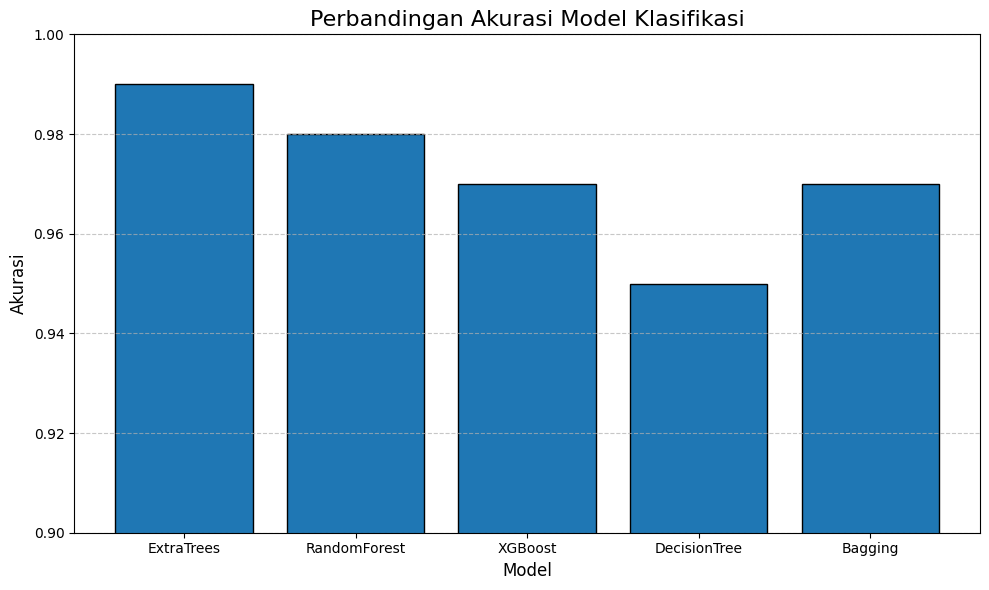

In [31]:
model_names = [
    'ExtraTrees',
    'RandomForest',
    'XGBoost',
    'DecisionTree',
    'Bagging'
]

accuracy_scores = [
    0.99,  # ExtraTrees
    0.98,  # RandomForest
    0.97,  # XGBoost
    0.95,  # DecisionTree
    0.97   # Bagging
]

# Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, edgecolor='black')
plt.title('Perbandingan Akurasi Model Klasifikasi', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Akurasi', fontsize=12)
plt.ylim(0.9, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
